In [2]:
import pandas as pd

# ganti nama file sesuai CSV kamu
df_text = pd.read_csv("/Users/macos/Documents/UNIV/SM6/NLP/Tugas_1/csv/jago_preprocessing.csv")

df_text.head()
df_text.info()

<class 'pandas.DataFrame'>
RangeIndex: 67355 entries, 0 to 67354
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   reviewId    67355 non-null  str  
 1   content     67355 non-null  str  
 2   score       67355 non-null  int64
 3   sentiment   67355 non-null  str  
 4   clean_text  66716 non-null  str  
 5   tokens      67355 non-null  str  
dtypes: int64(1), str(5)
memory usage: 3.1 MB


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Fitur pakai clean_text, label pakai sentiment
X = df_text["clean_text"].fillna("")
y = df_text["sentiment"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi dan training
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

# Prediksi
y_pred = log_reg.predict(X_test_tfidf)

# Evaluasi
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

     negatif       0.86      0.84      0.85      4398
     positif       0.92      0.93      0.93      9073

    accuracy                           0.90     13471
   macro avg       0.89      0.89      0.89     13471
weighted avg       0.90      0.90      0.90     13471

[[3693  705]
 [ 609 8464]]


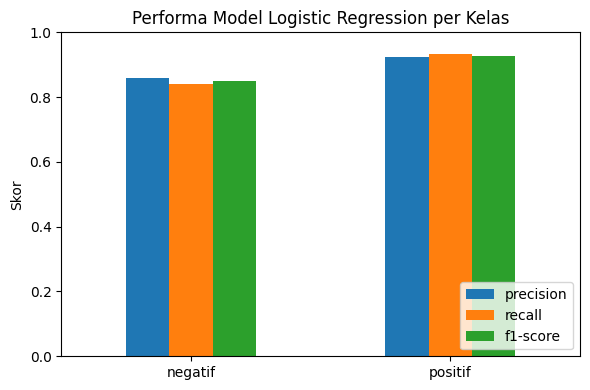

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# bikin dict dari classification_report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).T

# ambil hanya kelas (tanpa accuracy/macro/weighted)
df_classes = df_report.loc[["negatif", "positif"], ["precision", "recall", "f1-score"]]

# plot bar chart
ax = df_classes.plot(kind="bar", figsize=(6,4))
plt.title("Performa Model Logistic Regression per Kelas")
plt.ylabel("Skor")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [6]:
from sklearn.naive_bayes import MultinomialNB

# inisialisasi dan training
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# prediksi
y_pred_nb = nb.predict(X_test_tfidf)

# evaluasi
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))


              precision    recall  f1-score   support

     negatif       0.83      0.85      0.84      4398
     positif       0.93      0.92      0.92      9073

    accuracy                           0.90     13471
   macro avg       0.88      0.88      0.88     13471
weighted avg       0.90      0.90      0.90     13471

[[3745  653]
 [ 742 8331]]


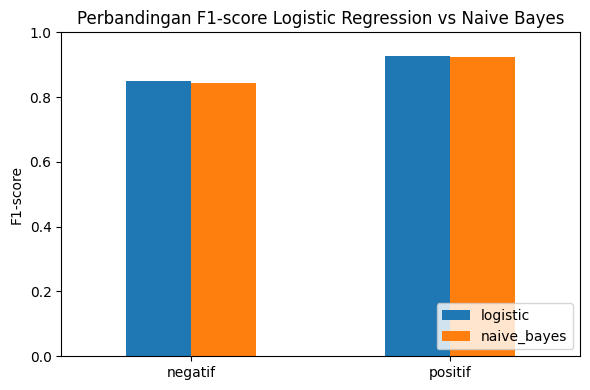

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# report logistic
report_log = classification_report(y_test, y_pred, output_dict=True)
df_log = pd.DataFrame(report_log).T.loc[["negatif", "positif"], ["f1-score"]]
df_log.columns = ["logistic"]

# report naive bayes
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
df_nb = pd.DataFrame(report_nb).T.loc[["negatif", "positif"], ["f1-score"]]
df_nb.columns = ["naive_bayes"]

# gabungkan
df_compare = pd.concat([df_log, df_nb], axis=1)

# plot
ax = df_compare.plot(kind="bar", figsize=(6,4))
plt.title("Perbandingan F1-score Logistic Regression vs Naive Bayes")
plt.ylabel("F1-score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Dua algoritma baseline, Logistic Regression dan Multinomial Naive Bayes, keduanya mencapai akurasi 90%. Logistic Regression sedikit unggul dari sisi keseimbangan performa antar kelas (macro f1 0.89 vs 0.88), sehingga dipilih sebagai model utama.

In [ ]:
import pandas as pd


df_test = pd.DataFrame({
    "text": X_test,
    "true": y_test,
    "pred_logreg": y_pred
})

#  seharusnya negatif tapi diprediksi positif
mask = (df_test["true"] == "negatif") & (df_test["pred_logreg"] == "positif")
df_test[mask].sample(10, random_state=42)


,text,true,pred_logreg
53733,sdsretaaa,negatif,positif
9307,saat upload ktp aplikasinya ada fitur fokus yg...,negatif,positif
60261,apakah dengan ngundang bisa dapat uang dari jago,negatif,positif
53705,nanti di tambah,negatif,positif
60909,bagus,negatif,positif
43001,aku ngasih tiga dulu ya soal nya aku baru nyoba,negatif,positif
61728,gmana cara tarik tunai tanpa kartu,negatif,positif
50255,kenapa gopay coin k blm saya terima,negatif,positif
29594,lumayan,negatif,positif
16574,rating nya lumayan banget takut install dan me...,negatif,positif


In [8]:
import joblib

joblib.dump(log_reg, "logreg_bank_jago_sentiment.pkl")
joblib.dump(tfidf, "tfidf_bank_jago.pkl")


['tfidf_bank_jago.pkl']